<h1>
<font color="#ff2e2e">
Color Space Conversion
</font>
</h1>

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

<h1>
a)
</h1>

In [4]:
import numpy as np

# Define the RGB color
rgb_color = np.array([50, 70, 130], dtype=np.uint8)

# define a function that converts an RGB color to CMYK color space
def RGB2CMYK(rgb_color):
    # separate the red, green, and blue values from the input and normalize them between 0 and 1
    R, G, B = rgb_color / 255
    # calculate the key (black) value as 1 minus the maximum of R, G, and B
    K = 1 - max(R, G, B)
    # calculate the cyan value as the difference between 1 and the normalized red value minus the key value, divided by 1 minus the key value
    C = (1 - R - K) / (1 - K)
    # calculate the magenta value as the difference between 1 and the normalized green value minus the key value, divided by 1 minus the key value
    M = (1 - G - K) / (1 - K)
    # calculate the yellow value as the difference between 1 and the normalized blue value minus the key value, divided by 1 minus the key value
    Y = (1 - B - K) / (1 - K)
    # return the CMYK color as a numpy array
    return np.array([C, M, Y, K])

# convert the RGB color to CMYK color space using the RGB2CMYK function
CMYK_color = RGB2CMYK(rgb_color)

# print the CMYK color
print(CMYK_color)

[0.61538462 0.46153846 0.         0.49019608]


<h3><font color = "#079e05"> This function is used to plot your result </font></h3>

In [5]:
def plotter(img_list, r, w, gray, wr, hr, fig_name = None):
    '''
    Plots images' list with its' caption and saves result image if you want.

    Parameters:
        img_list (list): The list of tuples of image and its' caption.
        r (int): The number of row(s).
        w (int): The number of colunm(s).
        gray (bool): The flag for plotting images in grayscale mode.
        wr (int): The width of one figure.
        hr (int): The height of one figure.
        fig_name (str): The name of the image of the plot. if not set this parameter the plot doesn't save.
    '''
    
    plt.rcParams['figure.figsize'] = (wr, hr)
    for i in range(len(img_list)):
        plt.subplot(r, w, i + 1)
        if img_list[i][2] == 'img':
            if gray:
                plt.imshow(img_list[i][0], cmap = 'gray')
            else:
                plt.imshow(img_list[i][0])
            plt.xticks([])
            plt.yticks([])
        elif img_list[i][2] == 'hist':
            plt.bar(np.arange(len(img_list[i][0])), img_list[i][0], color = 'c')
        else:
            raise Exception("Only image or histogram. Use third parameter of tuples in img_list and set it to img or hist.")
        plt.title(img_list[i][1])
    if fig_name is not None:
        plt.savefig(fig_name + '.png')
    plt.show()

<h3><font color = "#079e05"> BGR to YCbCr </font></h3>

In [6]:
def convert_to_ycbcr(image):
    '''
    Converts the color space of the input image to the YCbCr color space.
    
    Parameters:
        image (numpy.ndarray): The input image.
    
    Returns:
        numpy.ndarray: The result image.
    '''
    ycbcr_image = cv2.cvtColor(image, cv2.COLOR_BGR2YCrCb)
    return ycbcr_image

<h3><font color = "#079e05"> BGR to HSV </font></h3>

In [7]:
def convert_to_hsv(image):
    '''
    Converts the color space of the input image to the HSV color space.
    
    Parameters:
        image (numpy.ndarray): The input image.
    
    Returns:
        numpy.ndarray: The result image.
    '''

    hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    return hsv_image

<h3><font color = "#079e05"> Show the result </font></h3>

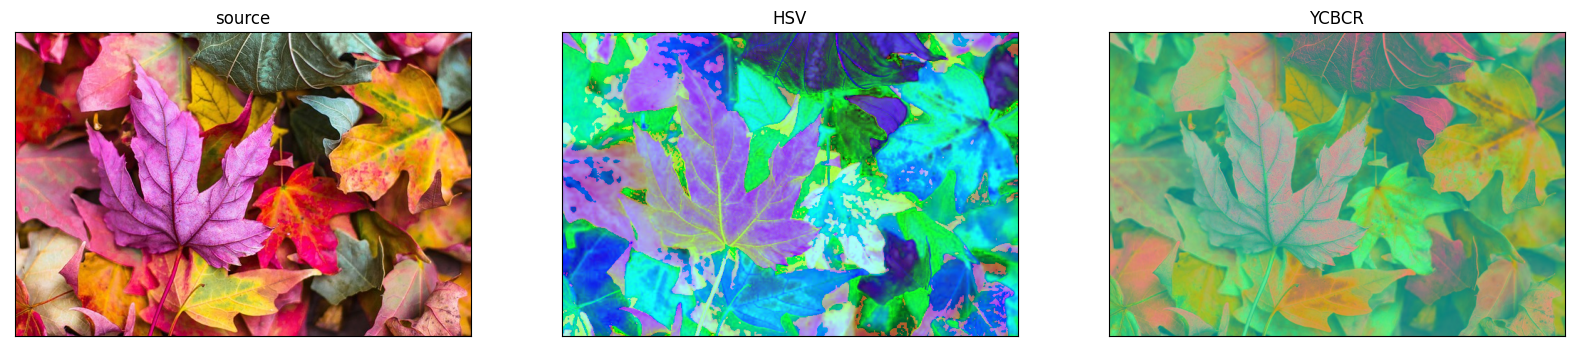

In [8]:
image_list = []
image = cv2.imread(os.path.join('images/Q1', '1.jpg'))
image_list.append([cv2.cvtColor(image, cv2.COLOR_BGR2RGB), 'source', 'img'])
image_list.append([convert_to_hsv(image), 'HSV', 'img'])
image_list.append([convert_to_ycbcr(image), 'YCBCR', 'img'])
plotter(image_list,1 , 3, True, 20, 10, '2A')

<h1>
<font color="#ff2e2e">
Extract Hsv Channels
</font>
</h1>

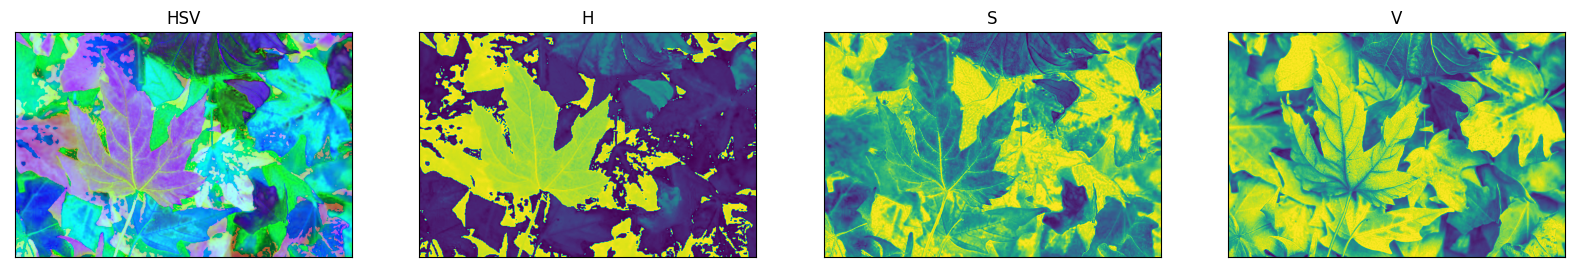

In [9]:
hsv = convert_to_hsv(image)
h,s,v = cv2.split(hsv)

image_list = []
image = cv2.imread(os.path.join('images/Q1', '1.jpg'))
image_list.append([hsv, 'HSV', 'img'])
image_list.append([h, 'H', 'img'])
image_list.append([s, 'S', 'img'])
image_list.append([v, 'V', 'img'])
plotter(image_list,1 , 4, False, 20, 10, '2B')

<h1>
<font color="#ff2e2e">
Finding Differences
</font>
</h1>

In [10]:
import cv2
import numpy as np

def dif(image1, image2):
    '''
    Creates a new image that shows the differences between two input images.
    
    Parameters:
        image1 (numpy.ndarray): The first input image.
        image2 (numpy.ndarray): The second input image.
    
    Returns:
        numpy.ndarray: The result difference image.
    '''
    # convert image1 and image2 from BGR to RGB color space
    image1 = cv2.cvtColor(image1, cv2.COLOR_BGR2RGB)
    image2 = cv2.cvtColor(image2, cv2.COLOR_BGR2RGB)
    
    # resize image2 to match the dimensions of image1
    image2 = cv2.resize(image2, (image1.shape[1], image1.shape[0]))
        
    # create a new image with the same dimensions as image1 and set all pixel values to 0
    result = np.zeros(image1.shape, dtype=np.uint8)
    
    # copy the red channel from image1 to the result image
    result[:,:,0] = image1[:,:,0]
    
    # copy the green channel from image2 to the result image
    result[:,:,1] = image2[:,:,1]
    
    # copy the blue channel from image2 to the result image
    result[:,:,2] = image2[:,:,2]
    
    # return the result image
    return result

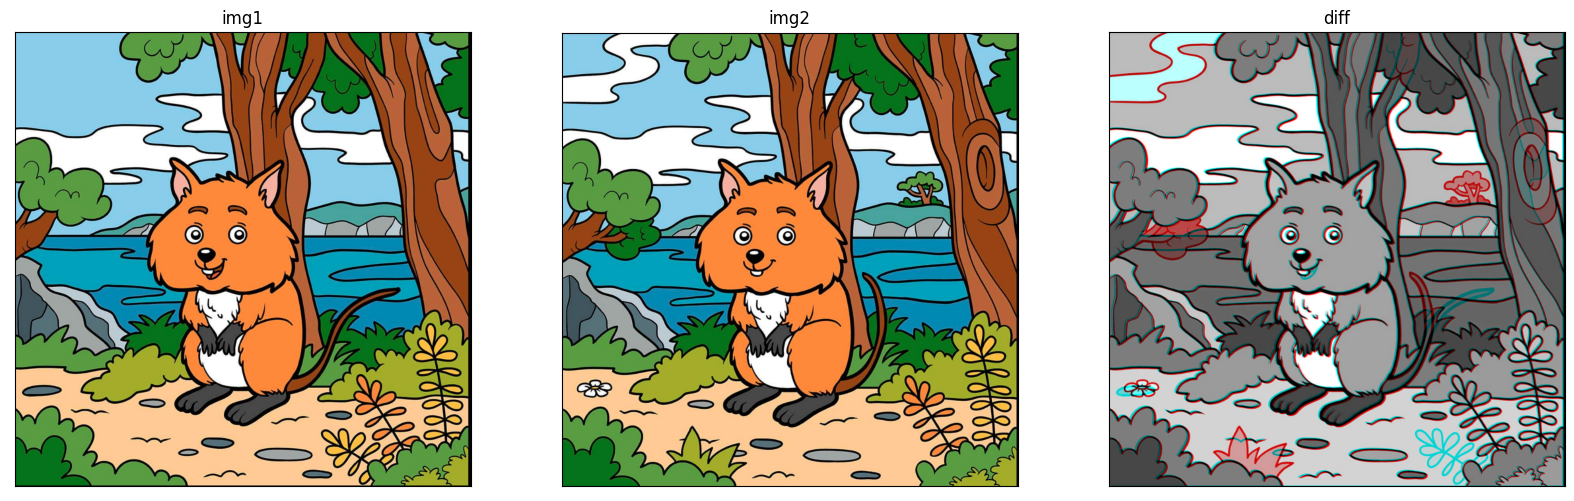

In [11]:
image_list = []

image1 = cv2.imread(os.path.join('images/Q1', '2.png'))
image_list.append([cv2.cvtColor(image1, cv2.COLOR_BGR2RGB), 'img1', 'img'])
image2 = cv2.imread(os.path.join('images/Q1', '3.png'))
image_list.append([cv2.cvtColor(image2, cv2.COLOR_BGR2RGB), 'img2', 'img'])

image1 = cv2.imread(os.path.join('images/Q1', '2.png'), cv2.IMREAD_GRAYSCALE)
image2 = cv2.imread(os.path.join('images/Q1', '3.png'), cv2.IMREAD_GRAYSCALE)
image_list.append([dif(image1, image2), 'diff', 'img'])

plotter(image_list,1 , 3, True, 20, 10, '2B')